## Differentiation

### The derivative of a function $f(x)$ w.r.t $x$ is defined as follows
### $f'(x) = \frac{df(x)}{dx} = \lim_{\Delta x\to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}$
### This involves evaluating the function $f$ at two points on the $x$-axis, namely at $x$ and $x + \Delta x$. Then divide the difference of these two values with the distance between the two points $(\Delta x)$. In this notebook, we take a look at some of the simple cases and see if indeed this matches with the derivatives. 

### First lets take a look at a simple function $f(x) - x^2$. We know that the derivative of this function is simply $2x$. But lets use the formula above (which is also called first-principle) to evaluate the derivative and then see if the result matches with the known value

In [1]:
### First let us create a grid of values of x over which we will compute the derivative.
x_values = range(0, 10) # the range-function creates range of integers, in this case all integers between 1 & 10



In [2]:
## We can then create the required values by running a loop as shown below
for x in x_values:
    print(x)

### Now we will be computing the derivative at each point on this grid. Let us define the function $f(x)$ in the code then.

In [3]:
def f(x):
    # This function is taking a value of x and return its square.
    return x**2

In [4]:
## Lets test this function. Let's evaluate the function f at x=5. It should give 25.
f(5)

### Lets us now evaluate the function on our grid of x-values

In [5]:
# We are going to now run the loop over the x_values, but this time compute the value of f(x) at each point
for x in x_values:
    y = f(x)
    print("Value of f({}) = {}".format(x, y))

### Now tht we have the function, we can compute the derivative using first-principle, i.e., $f'(x) = \frac{df(x)}{dx} = \lim_{\Delta x\to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}$. But before we do that we will need a a value of $\Delta x$. What would be a good value? Smaller the better. Lets us start with something which is constant, let's say $0.01$

In [6]:
delta_x = 0.01
# We are are again going to loop over all the values. 
# But this time we will not just compute f(x), but also f(x + delta_x)
for x in x_values:
    df = f(x + delta_x) - f(x) # Computing the numerator of the above equation
    df_dx = df/delta_x # Dividing by the quantity in the denominator
    print("Value of f'(x) at {} = {}".format(x, df_dx))

Value of f'(x) at 0 = 0.01
Value of f'(x) at 1 = 2.0100000000000007
Value of f'(x) at 2 = 4.009999999999891
Value of f'(x) at 3 = 6.009999999999849
Value of f'(x) at 4 = 8.009999999999806
Value of f'(x) at 5 = 10.009999999999764
Value of f'(x) at 6 = 12.010000000000076
Value of f'(x) at 7 = 14.009999999999678
Value of f'(x) at 8 = 16.00999999999999
Value of f'(x) at 9 = 18.009999999999593


### Notice that this is the value of the derivative of $x^2$ as computed numericaly. We of course know analytically what this value should be, from $\frac{d}{dx}(x^2) = 2x$. Lets put those two numbers side-by-side.

In [7]:
for x in x_values:
    print("Known value of f'(x) at {} = {}".format(x, 2*x))

Known value of f'(x) at 0 = 0
Known value of f'(x) at 1 = 2
Known value of f'(x) at 2 = 4
Known value of f'(x) at 3 = 6
Known value of f'(x) at 4 = 8
Known value of f'(x) at 5 = 10
Known value of f'(x) at 6 = 12
Known value of f'(x) at 7 = 14
Known value of f'(x) at 8 = 16
Known value of f'(x) at 9 = 18


### We see that the numbers are pretty close. In fact the numers will much closer, if we choose an even smaller value of $\Delta x$. Let us now write a complete code that will do this computation.

In [8]:
def f(x):
    # This function is taking a value of x and return its square.
    return x**2

def deriv(x):
    # This is the derivative function that we know analytically.
    return 2*x

def compute_deriv(x, dx):
    # This function computes the derivative at a given point
    df = f(x + dx) - f(x)
    df_dx = df/dx
    return df_dx

In [9]:
delta_x = 0.001 ## Change this to see what effect you have in the derivative
for x in x_values:
    df_dx = compute_deriv(x, delta_x)
    print("Numerically: f'(x) at {} = {}: Analytically f'(x) at {} = {}".format(x, df_dx, x, deriv(x)))

Numerically: f'(x) at 0 = 0.001: Analytically f'(x) at 0 = 0
Numerically: f'(x) at 1 = 2.0009999999996975: Analytically f'(x) at 1 = 2
Numerically: f'(x) at 2 = 4.000999999999699: Analytically f'(x) at 2 = 4
Numerically: f'(x) at 3 = 6.000999999999479: Analytically f'(x) at 3 = 6
Numerically: f'(x) at 4 = 8.0010000000037: Analytically f'(x) at 4 = 8
Numerically: f'(x) at 5 = 10.001000000002591: Analytically f'(x) at 5 = 10
Numerically: f'(x) at 6 = 12.001000000005035: Analytically f'(x) at 6 = 12
Numerically: f'(x) at 7 = 14.00100000000748: Analytically f'(x) at 7 = 14
Numerically: f'(x) at 8 = 16.000999999988608: Analytically f'(x) at 8 = 16
Numerically: f'(x) at 9 = 18.000999999983947: Analytically f'(x) at 9 = 18


### You can now play around with the value of `delta_x` above and check how the derivative is affected.

### Now let's do some visualization, to get a deeper understanding. We are going to numerically compute the derivative for three different values of `delta_x`, $1.0, 0.5, 0.05$. We will plot these numerically computed derivatives vs the value of $x$ and compare them with the analytically known value of the derivative, i.e., $2x$

In [10]:
df_dx_1 = []
df_dx_2 = []
df_dx_3 = []
analytical = []
for x in x_values:
    # We will append to the above lists the values of the derivatives we computing below.
    df_dx_1.append(compute_deriv(x, 1)) # for the first case
    df_dx_2.append(compute_deriv(x, 0.5)) # for the second case
    df_dx_3.append(compute_deriv(x, 0.05)) # for the third case
    analytical.append(2*x)


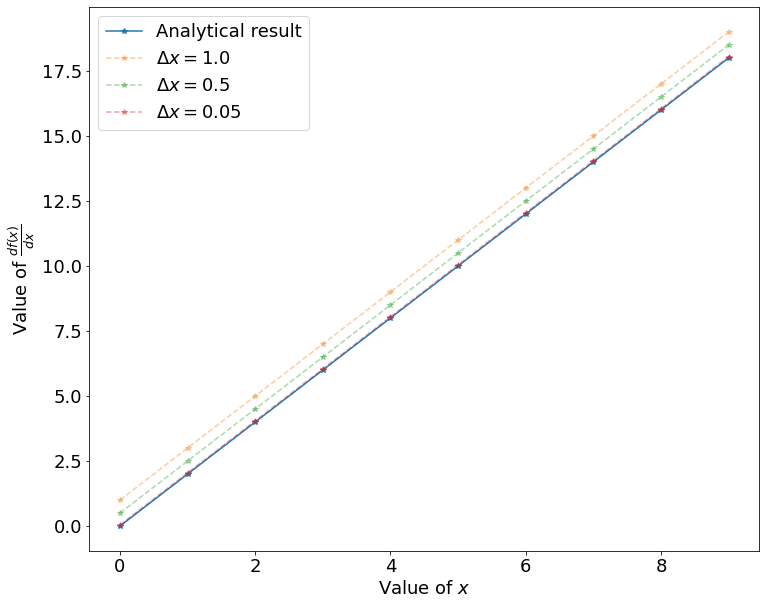

In [11]:
import pylab as pl ## Plotting module needs to be imported, since it is not available by default in Python
pl.rcParams.update({'font.size': 18}) # Sets font-size of the plot
pl.figure(figsize=(12,10)) # Sets size of the figure
pl.plot(x_values, analytical, '*-', label="Analytical result") # Plots the analytical expression
pl.plot(x_values, df_dx_1, '*--', label="$\\Delta x = 1.0$", alpha=0.4) # Plots the largest delta_x
pl.plot(x_values, df_dx_2, '*--', label="$\\Delta x = 0.5$", alpha=0.4) # Plots the intermediate delta_x
pl.plot(x_values, df_dx_3, '*--', label="$\\Delta x = 0.05$", alpha=0.4) # # Plots the smallest delta_x
pl.xlabel('Value of $x$') # Set the label on the x-axis
pl.ylabel('Value of $\\frac{df(x)}{dx}$') # Set the label on the y-axis
pl.legend() # Set the legend
pl.show() # display the plot (not required for the notebook... but good to know for general purpose)

### Now that we have seen how this can be done, write a program to do the same computation (basically repeat everything done above) for $f(x) = x^3$. The code skeleton is provides below:

In [12]:
def f_cube(x):
    # This function is taking a value of x and return its cube.
    return 

def deriv_cube(x):
    # This is the derivative function that we know analytically for x cube.
    return 

def compute_deriv(x, dx):
    # This function computes the derivative at a given point
    df_cube = f_cube(x + dx) - f_cube(x)
    df_dx = df_cube/dx
    return df_cube_dx

### Once you have the functions ready, then repeat the steps in cell 9 onwards for this new function `f_cube`